In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
sessions = pd.read_json("../data/raw/second/sessions.jsonl", lines=True)
buy_sessions = sessions[sessions['event_type'] == 'BUY_PRODUCT'].copy()
buy_sessions['product_id'] = buy_sessions['product_id'].astype(str)
buy_sessions['date']=buy_sessions['timestamp'].dt.date
buy_sessions.drop(columns=['user_id', 'event_type', 'offered_discount','session_id','timestamp'], inplace=True)
df = buy_sessions.groupby(by=['date','product_id']).count().unstack(fill_value=0).stack().rename(columns={'purchase_id': 'amount'}).reset_index()
df['product_id'] = df['product_id'].astype(str)

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df=df[df['product_id']=='1005']

In [5]:
df=df.groupby(by=[pd.Grouper(key='date', freq='W')]).sum()

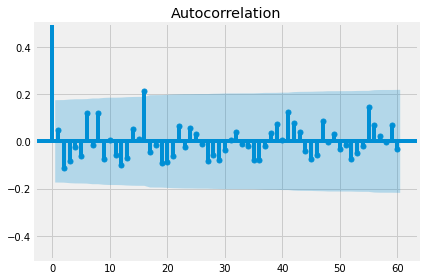

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df, lags=60);
plt.ylim([-0.5,0.5])
plt.tight_layout()

In [7]:
df.index=df.index.get_level_values(0)
df.index

DatetimeIndex(['2019-08-04', '2019-08-11', '2019-08-18', '2019-08-25',
               '2019-09-01', '2019-09-08', '2019-09-15', '2019-09-22',
               '2019-09-29', '2019-10-06',
               ...
               '2021-10-24', '2021-10-31', '2021-11-07', '2021-11-14',
               '2021-11-21', '2021-11-28', '2021-12-05', '2021-12-12',
               '2021-12-19', '2021-12-26'],
              dtype='datetime64[ns]', name='date', length=126, freq='W-SUN')

In [8]:
train_len=int(0.8*len(df))
train = df[0:train_len]
test = df[train_len:]

In [28]:
sma = df.copy()
ma_window = 7
sma['sma_forecast'] = df['amount'].rolling(ma_window).mean()
sma['sma_forecast'][train_len:] = sma['sma_forecast'][train_len-1]

In [29]:
sma.index=pd.to_datetime(sma.index)

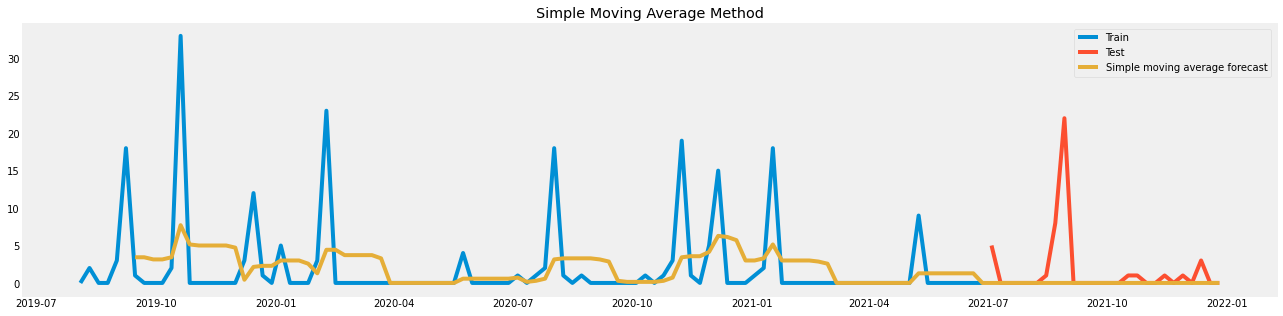

In [30]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['amount'], label='Train')
plt.plot(test['amount'], label='Test')
plt.plot(sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [31]:
rmse = np.sqrt(mean_squared_error(test['amount'], sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['amount']-sma['sma_forecast'][train_len:])/test['amount'])*100,2)
print("RMSE:",rmse)
print("MAPE:",mape)

RMSE: 4.75
MAPE: 100.0


In [32]:
sma = df.copy()
minimal_window=1
minimal_rmse=sys.maxsize
for ma_window in range(1,100):
    sma['sma_forecast'] = df['amount'].rolling(ma_window).mean()
    sma['sma_forecast'][train_len:] = sma['sma_forecast'][train_len-1]
    sma.index=pd.to_datetime(sma.index)
    rmse = np.sqrt(mean_squared_error(test['amount'], sma['sma_forecast'][train_len:])).round(2)
    mape = np.round(np.mean(np.abs(test['amount']-sma['sma_forecast'][train_len:])/test['amount'])*100,2)
    print("RMSE:",rmse)
    print("MAPE:",mape)
    if rmse<minimal_rmse:
        minimal_window=ma_window
        minimal_rmse=rmse
print(minimal_window,minimal_rmse)

RMSE: 4.75
MAPE: 100.0
RMSE: 4.75
MAPE: 100.0
RMSE: 4.75
MAPE: 100.0
RMSE: 4.75
MAPE: 100.0
RMSE: 4.75
MAPE: 100.0
RMSE: 4.75
MAPE: 100.0
RMSE: 4.75
MAPE: 100.0
RMSE: 4.49
MAPE: inf
RMSE: 4.5
MAPE: inf
RMSE: 4.52
MAPE: inf
RMSE: 4.53
MAPE: inf
RMSE: 4.55
MAPE: inf
RMSE: 4.56
MAPE: inf
RMSE: 4.57
MAPE: inf
RMSE: 4.58
MAPE: inf
RMSE: 4.59
MAPE: inf
RMSE: 4.59
MAPE: inf
RMSE: 4.6
MAPE: inf
RMSE: 4.61
MAPE: inf
RMSE: 4.61
MAPE: inf
RMSE: 4.62
MAPE: inf
RMSE: 4.63
MAPE: inf
RMSE: 4.63
MAPE: inf
RMSE: 4.49
MAPE: inf
RMSE: 4.48
MAPE: inf
RMSE: 4.48
MAPE: inf
RMSE: 4.49
MAPE: inf
RMSE: 4.49
MAPE: inf
RMSE: 4.5
MAPE: inf
RMSE: 4.46
MAPE: inf
RMSE: 4.45
MAPE: inf
RMSE: 4.46
MAPE: inf
RMSE: 4.46
MAPE: inf
RMSE: 4.47
MAPE: inf
RMSE: 4.48
MAPE: inf
RMSE: 4.47
MAPE: inf
RMSE: 4.47
MAPE: inf
RMSE: 4.47
MAPE: inf
RMSE: 4.46
MAPE: inf
RMSE: 4.46
MAPE: inf
RMSE: 4.46
MAPE: inf
RMSE: 4.46
MAPE: inf
RMSE: 4.46
MAPE: inf
RMSE: 4.45
MAPE: inf
RMSE: 4.45
MAPE: inf
RMSE: 4.45
MAPE: inf
RMSE: 4.45
MAPE: inf
RM